# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [515]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Data Overview

- Observations
- Sanity checks

In [516]:
# Loading the dataset
df = pd.read_csv("C:/Users/veren/OneDrive/Documenten/MIT/hypothesis testing and classification/project2/ExtraaLearn.csv")

In [517]:
# checking first observations of the dataset
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [518]:
# controlling number of observations and columns in the dat
df.shape

(4612, 15)

There are 4612 observations and 15 variables in the dataset.

In [519]:
# checking for missing values adn data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

There are no missing values at least on the numeric variables. The string variables need a second check. 10 categorical variables, the rest of the variables are numeric or float.

In [520]:
# control numbers of unique categories/values per variable
df.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

Most categorical variables have 2 or 3 categories.

In [521]:
#checking for duplicates
df.duplicated().sum()

0

Each row represents a unique person/ potential customer.

In [522]:
# make a back-up of the data
df_orig=df
# Dropping the columns that are not used in the analysis like ID
df=df.drop(['ID'],axis=1)

In [523]:
# Creating numerical columns
num_cols=['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit', 'status']

# Creating categorical variables 
cat_cols= ['current_occupation', 'profile_completed', 'first_interaction','last_activity','print_media_type1','print_media_type2','digital_media',
           'educational_channels','referral' ]

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

# Univariate Analysis

In [524]:
# controlling descriptive statistics for continuous variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


 - There are 4612 observations.<br>
 - The average age is 46, minimum age is 18 and maximum 63. The median age is 51.<br>
 - On average customer have around 3.6 website visits,  with a standaard deviation of around 283. The maximum visits are 30 website visits while the 3rd quartile is around 5 visits, thus there seem to be some extreme cases. <br>
 - The average time spent on website  is 724 (it does not say if this is hours, minutes or seconds in the data description), while the median time spent on the website is 376 which is a lot lower. The maximum is 2537 and the third quartile is 1336. There seems to be a difference between a group of customers that spents no time or little time on the website and a group that  spents a lot of time on the website.<br>
 - If page views per visits are considered. The mean page views per visit are 3 and the maximum number is around 18. The 3rd quartile is close to 4 pages. Thus most customers use visit only few pages per visit.<br>
 - The mean status is around 0.3,  and the maximum and 3rd quartile are both 1. <br>
 - Given that the minimum value of website_visits, time_spent_on_website, page_views_per_visit is 0 there is a group that does not make use of the website at all. 

In [525]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12, 7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # X-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )  # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )  # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )  # Add median to the histogram

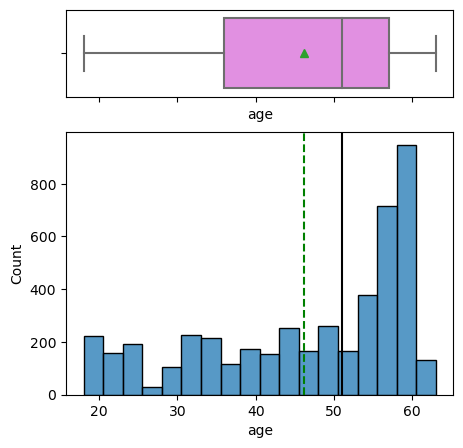

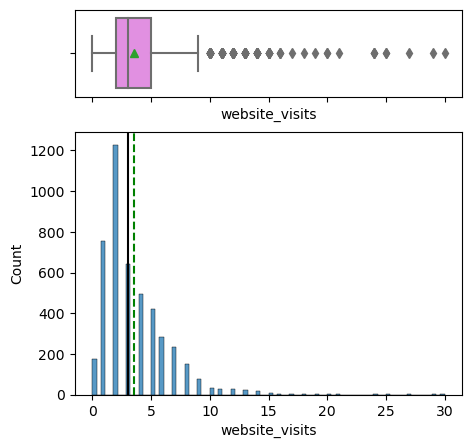

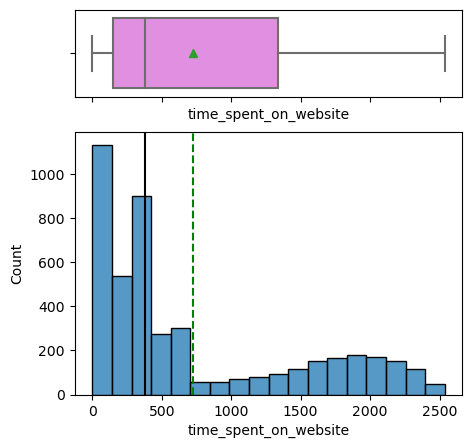

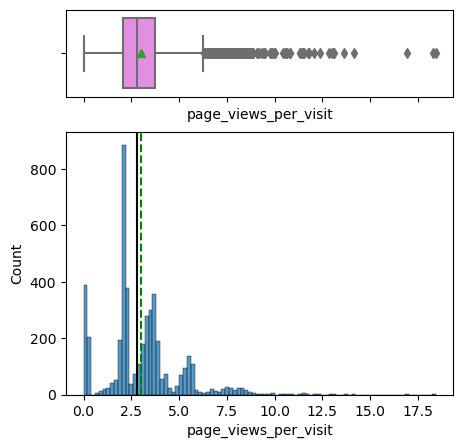

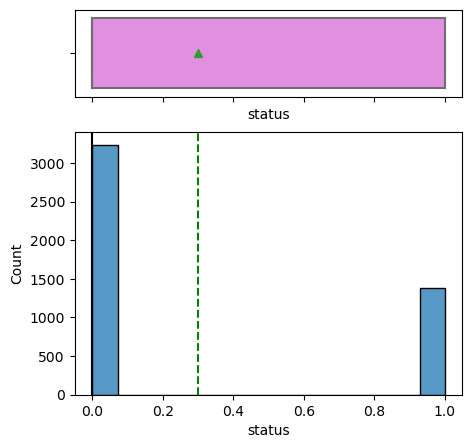

In [526]:
# loop through all numeric variables and produce boxplot and histogram
for num in num_cols:
    histogram_boxplot(df, num, figsize=(5,5))

 - Age is skewed to the left with a peak of more than 1250 persons between age 55 and almost 60. <br>
 - Website_visits are right skewed with a peak of mor than 2000 between 0 to 3 visits indicating.<br>
 - Time spent on website visits is also skewed to the rigth while page views per visit are almost normally distributed but showing that the number of viws is rather low. It seems that a huge group of leads hardly uses the websits with few visits, few pages visited and a limited amount of time spent on the website.<br>
 - More than 3000 leads have the status 0 indicating that they did not buy a product and **slightly below 1500 persons bought the  product**.
 - Outliers exists on the variables website_visits and pages_viewed_per_visit. Since we are planning to use a decision-tree model it would be better to remove them as decision-trees are sensitive to outliers.

In [527]:
# Printing the % sub categories of each categorical variable
for i in cat_cols:
    print(df[i].value_counts(normalize=True))
    print('*'*40)

Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64
****************************************
High      0.490893
Medium    0.485906
Low       0.023200
Name: profile_completed, dtype: float64
****************************************
Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64
****************************************
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: last_activity, dtype: float64
****************************************
No     0.892238
Yes    0.107762
Name: print_media_type1, dtype: float64
****************************************
No     0.94948
Yes    0.05052
Name: print_media_type2, dtype: float64
****************************************
No     0.885733
Yes    0.114267
Name: digital_media, dtype: float64
****************************************
No     0.847138
Yes    0.152862
Name: educational_channels, dtype: float64
******

 - Current occuptation almost **57%** of the customers are **professionals**, 31% is unemployed and 12 % are students.<br>
 - Most customers have a **high or medium completed profile**: high in 49% of the cases, medium in almost 49% cases.<br>
 - The first interaction is in 55% of the cases via the website and in approximately 45% via the mobile app. <br>
 - The last activity is mostly via e-mail 49% followd by phone appproximatley 27%  and website approximately 24%.<br>
 - If the channels through with  lead heard about Extralarn are considered : **15%  heard about Extralean in the educational channels**, 11.4% heard about ExtraLearn through digital media and almost 11 % has seen an advertisement in print media type1. Only 5% has seen an advertisement in print media type 2 and 2% of the leads where referred to ExtraLearn by someone else.
 - The categorical variables do not contain any missing values or invalid categories.

# Bivariate Analysis

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

In [528]:
# Defining the stacked_barplot() function
def stacked_barplot(data,predictor,xlab, target,figsize=(10,6)):
    # creating crosstable of predictor and target variable
    cross_tab = pd.crosstab(index=data[predictor],
                        columns=data[target])
    # creating crosstable with the percentages
    cross_tab_prob = pd.crosstab(data[predictor],data[target],normalize='index')*100
    # plotting the table as barplot
    cross_tab_prob.plot(kind='bar',figsize=figsize,stacked=True)
    #legend
    plt.legend(loc="lower right")
    #labels
    plt.xlabel(xlab)
    plt.ylabel(target)
    # adding percentages per category
    for n, x in enumerate([*cross_tab.index.values]):
        for proportion in cross_tab_prop.loc[x]:
            plt.text(x=n, y=proportion, s=f'{np.round(proportion, 1)}%', color="black",fontsize=10) 
    plt.show()
def stacked_barplot2(data,predictor,xlab, target,figsize=(10,6)):
    # creating crosstable of predictor and target variable
    cross_tab = pd.crosstab(index=data[predictor],
                        columns=data[target])
    # creating crosstable with the percentages
    cross_tab_prob = pd.crosstab(data[predictor],data[target],normalize='index')*100
    #print percentages
    print(round(cross_tab_prob,2))
    # plotting table
    cross_tab_prob.plot(kind='bar',figsize=figsize,stacked=True)
    #legend
    plt.legend(loc="lower right")
    #labels
    plt.xlabel(xlab)
    plt.ylabel(target)
    plt.show()

**1.  Does occupation affects lead status?**

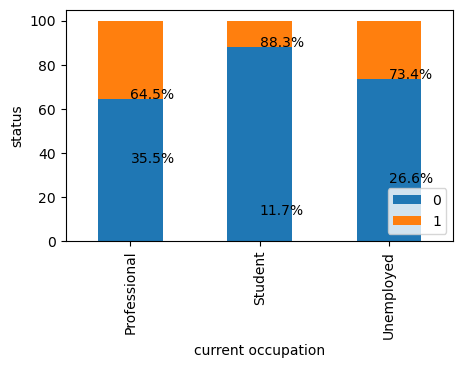

In [529]:
# creating stacked barplot for current_occupation and status
stacked_barplot(data=df,predictor= "current_occupation",xlab="current occupation", target="status" , figsize=(5,3))

Professionals more often buy the product (almost 36%), followed by unemployed (almost 27%) and students (almost 12%). This is not surprising given that the majority of leads are professionals.

**2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?**

status                 0      1
first_interaction              
Mobile App         89.47  10.53
Website            54.41  45.59


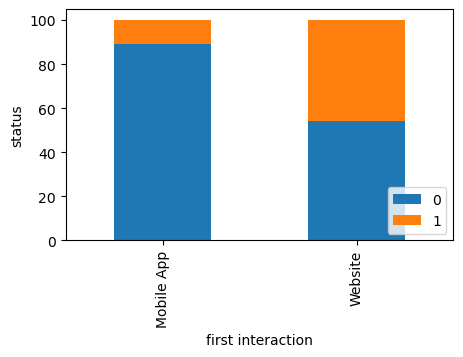

In [530]:
# creating stacked barplot for first_interaction and status
stacked_barplot2(data=df, predictor='first_interaction', xlab='first interaction', target='status', figsize=(5,3))

**First interaction through the website is more effective**: Approximately 46% of the leads buy the  product compared to approximately 11% of leads whose first interaction is via the mobile app.

**3. The company uses multiple modes to interact with prospects. Which way of interaction works best?**

status                0      1
last_activity                 
Email Activity    69.67  30.33
Phone Activity    78.69  21.31
Website Activity  61.55  38.45


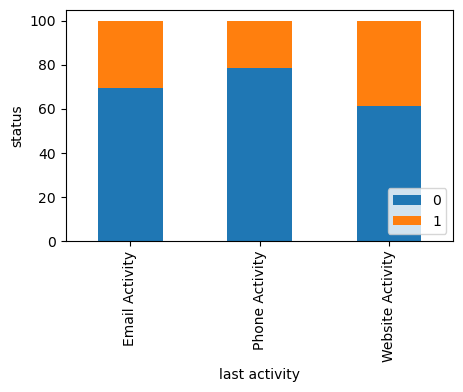

In [531]:
# creating stacked barplot for last_activity and status
stacked_barplot2(data= df,predictor= 'last_activity',xlab= 'last activity',target='status' , figsize=(5,3))

**38%** of leads where the last activity was via **website** buy the product compared to 30%  who interacted via e-mail  21% who interacted via phone.

**4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?**

status                    0      1
educational_channels              
No                    69.80  30.20
Yes                   72.06  27.94


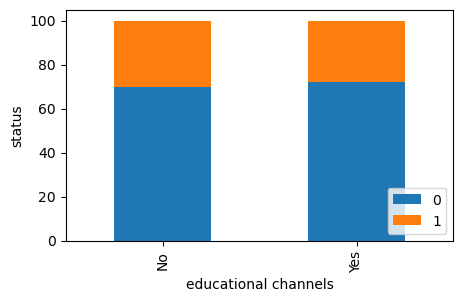

status             0      1
digital_media              
No             70.40  29.60
Yes            68.12  31.88


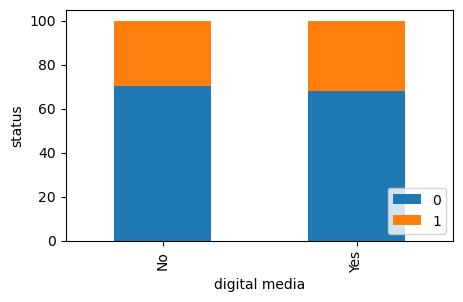

status                 0      1
print_media_type1              
No                 70.40  29.60
Yes                68.01  31.99


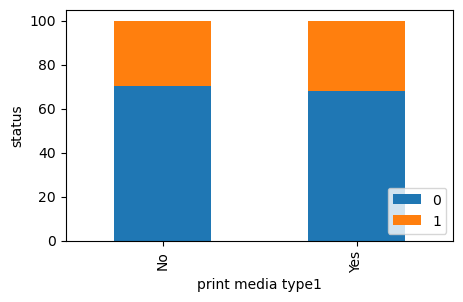

status                 0      1
print_media_type2              
No                 70.27  29.73
Yes                67.81  32.19


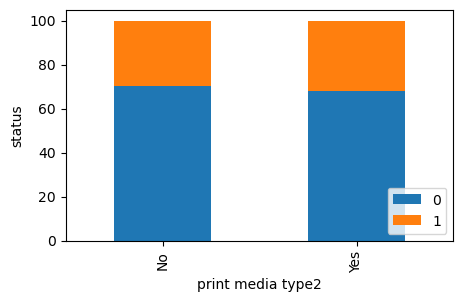

In [532]:
#looping through chanlle variables and creating a stacked barplot with status for each channel
channels =[ 'educational_channels', 'digital_media', 'print_media_type1', 'print_media_type2', 'referral']
xlabels=  ['educational channels', 'digital media', 'print media type1', 'print media type2', 'referral']
for i in range(0,4):
    stacked_barplot2(df, channels[i], xlabels[i], 'status' , figsize=(5,3))

There are little differences between leads that buy or do not buy for print type 1 and 2, digital media and educational channels. However, almost **68% of leads that have been referred to ExtraLearn by someone else buy the product. That is a lot more than for the other channels where it is mostly below 32%.**

**5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?**

status                 0      1
profile_completed              
High               58.22  41.78
Low                92.52   7.48
Medium             81.12  18.88


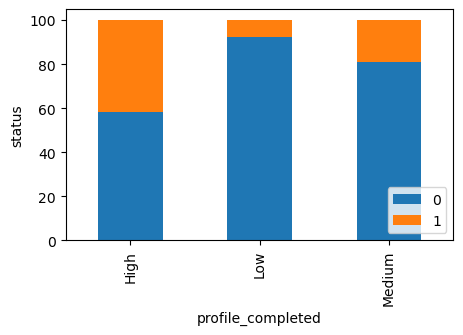

In [533]:
# creating stacked barplot for profile_completed and status
stacked_barplot2(data= df,predictor= 'profile_completed',xlab= 'profile_completed',target='status' , figsize=(5,3))

41.78% of leads that filled in their profile completely bought the product compared to 18.88% with medium filled profiles and 7.48% with a low profile completion status. Thus there seems to be a trend but it can also be that customers more inclined to buy the product are more likely to fill in the profile.


**Is there a correlation between the continuous variables?**

<Axes: >

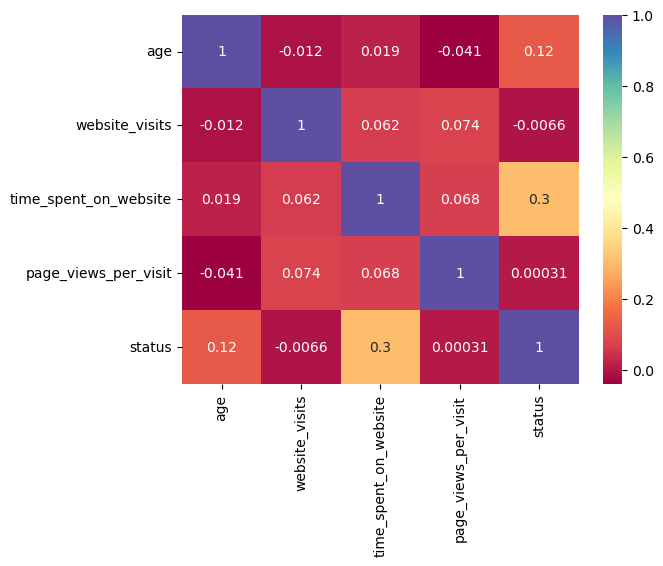

In [534]:
#calculating correlation between numeric variables
df.correlation=df.corr()
# plotting heatmap.
sns.heatmap(df.correlation, annot=True, cmap="Spectral")


The continuous variables are very lowly correlated with each other and with status.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

- Missing values: There are no missing values. 
- Feature engineering: 
  - Correlations: There are no strong correlations among continuous variables. Thus, there is no need for a PCA.
  - Outliers: two variables contain outliers: website_visits and page_views_per_visit. However, there are quite some outliers, therefore removing them does not seem a suitable solution. I will cap those values that are more than 3 std away. This caps the most extreme outliers, decreasing the range a bit.

In [535]:
#calculating lower and upper bounds 
lower_limit = df["website_visits"].mean() - (3 * df["website_visits"].std())
upper_limit = df["website_visits"].mean() + (3 *df["website_visits"].std())
#capping the variable at the lower and upper bounds
df["website_visits"] = np.where(df["website_visits"] > upper_limit, 
                                upper_limit,
                                np.where( df["website_visits"] < lower_limit,
                                         lower_limit,
                                         df["website_visits"]
                                        )
                               )



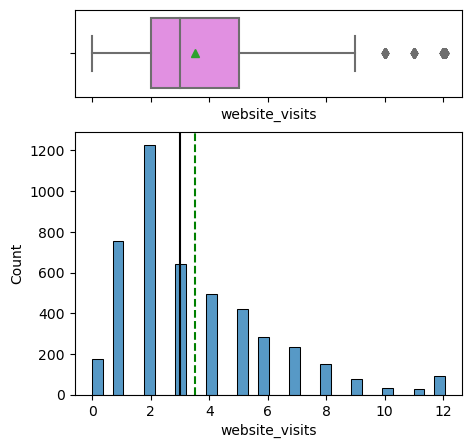

In [536]:
# check change by looking at distribution and boxplot
histogram_boxplot(df, "website_visits", figsize=(5,5))

In [537]:
#calculating lower and upper bounds 
lower_limit = df["page_views_per_visit"].mean() - (3 * df["page_views_per_visit"].std())
upper_limit = df["page_views_per_visit"].mean() + (3 *df["page_views_per_visit"].std())
#capping the variable at the lower and upper bounds
df["page_views_per_visit"] = np.where(df["page_views_per_visit"] > upper_limit, 
                                upper_limit,
                                np.where( df["page_views_per_visit"] < lower_limit,
                                         lower_limit,
                                         df["page_views_per_visit"]
                                        )
                               )


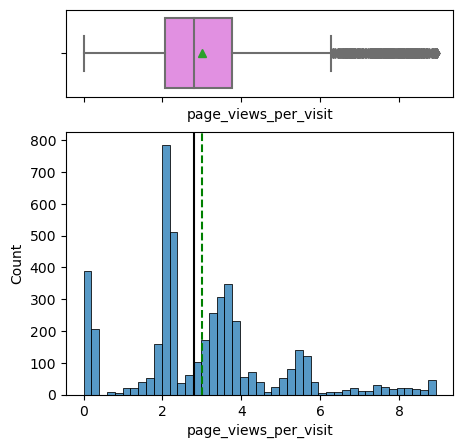

In [538]:
# check change by looking at distribution and boxplot
histogram_boxplot(df, "page_views_per_visit", figsize=(5,5))

In [539]:
# additional control: descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000000
website_visits,4612.0,3.513134,2.574974,0.0,2.00000,3.000,5.00000,12.054183
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000000
page_views_per_visit,4612.0,3.003753,1.872815,0.0,2.07775,2.792,3.75625,8.930500
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000000


The maximum of website_visits decreased from 30 to 12 and for page_views_per_visit from 18 to almost 9.

**Creating dummy variables for categorical Variables**

In [540]:
# Creating list of dummy columns
to_get_dummies_for = ['current_occupation', 'profile_completed', 'last_activity' ]

# Creating dummy variables
df = pd.get_dummies(data = df, columns = to_get_dummies_for, drop_first = True)      
    

# Mapping variables with 1 and 0 coding
dict_first_interaction = {'Website': 1, 'Mobile App':0}
dict_print_media_type1 = {'Yes': 1, 'No': 0}
dict_print_media_type2 = {'Yes': 1, 'No':0}
dict_digital_media = {'Yes': 1, 'No': 0}
dict_educational_channels = {'Yes': 1, 'No': 0}
dict_referral = {'Yes': 1, 'No':0}


df['first_interaction'] = df.first_interaction.map(dict_first_interaction)
df['print_media_type1'] = df.print_media_type1.map(dict_print_media_type1)
df['print_media_type2'] = df.print_media_type2.map(dict_print_media_type2)
df['digital_media'] = df.digital_media.map(dict_digital_media)
df['educational_channels'] = df.educational_channels.map(dict_educational_channels)
df['referral'] = df.referral.map(dict_referral)


In [541]:
# Separating target variable and other variables
Y= df.status
X= df.drop(columns = ['status'])

In [542]:
# Splitting the data into train en test set with stratification
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

In [543]:
# Creating metric function te evaluate model
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['status no', 'status yes'], yticklabels=['status no', 'status yes'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## EDA

- It is a good idea to explore the data once again after manipulating it.

The impact of the outlier removal has already been assessed in the data preprocessing part.

In [544]:
Y.describe() 

count    4612.000000
mean        0.298569
std         0.457680
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: status, dtype: float64

In [545]:
 y_train.value_counts()

0    2264
1     964
Name: status, dtype: int64

In [546]:
 y_test.value_counts()

0    971
1    413
Name: status, dtype: int64

As expected Y only contains status and y_train and y_test seem okay as well.

In [547]:
X.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000000
first_interaction,4612.0,0.551171,0.497429,0.0,0.00000,1.000,1.00000,1.000000
website_visits,4612.0,3.513134,2.574974,0.0,2.00000,3.000,5.00000,12.054183
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000000
page_views_per_visit,4612.0,3.003753,1.872815,0.0,2.07775,2.792,3.75625,8.930500
print_media_type1,4612.0,0.107762,0.310114,0.0,0.00000,0.000,0.00000,1.000000
print_media_type2,4612.0,0.050520,0.219040,0.0,0.00000,0.000,0.00000,1.000000
digital_media,4612.0,0.114267,0.318170,0.0,0.00000,0.000,0.00000,1.000000
educational_channels,4612.0,0.152862,0.359894,0.0,0.00000,0.000,0.00000,1.000000
referral,4612.0,0.020165,0.140579,0.0,0.00000,0.000,0.00000,1.000000


In [548]:
X_train.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
age,3228.0,46.155204,13.148637,18.0,36.00000,51.000,57.000,63.000000
first_interaction,3228.0,0.548327,0.497736,0.0,0.00000,1.000,1.000,1.000000
website_visits,3228.0,3.588233,2.621803,0.0,2.00000,3.000,5.000,12.054183
time_spent_on_website,3228.0,727.674721,747.178608,0.0,143.75000,376.500,1363.750,2537.000000
page_views_per_visit,3228.0,3.058656,1.878126,0.0,2.09375,2.865,3.778,8.930500
print_media_type1,3228.0,0.109975,0.312907,0.0,0.00000,0.000,0.000,1.000000
print_media_type2,3228.0,0.052974,0.224016,0.0,0.00000,0.000,0.000,1.000000
digital_media,3228.0,0.111214,0.314446,0.0,0.00000,0.000,0.000,1.000000
educational_channels,3228.0,0.156753,0.363624,0.0,0.00000,0.000,0.000,1.000000
referral,3228.0,0.018897,0.136183,0.0,0.00000,0.000,0.000,1.000000


In [549]:
X_test.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
age,1384.0,46.308526,13.195435,18.0,35.00000,51.0000,57.0000,63.000000
first_interaction,1384.0,0.557803,0.496827,0.0,0.00000,1.0000,1.0000,1.000000
website_visits,1384.0,3.337976,2.454297,0.0,2.00000,3.0000,5.0000,12.054183
time_spent_on_website,1384.0,715.466763,736.153744,0.0,156.75000,375.0000,1283.7500,2531.000000
page_views_per_visit,1384.0,2.875699,1.854736,0.0,2.04175,2.6395,3.7095,8.930500
print_media_type1,1384.0,0.102601,0.303547,0.0,0.00000,0.0000,0.0000,1.000000
print_media_type2,1384.0,0.044798,0.206934,0.0,0.00000,0.0000,0.0000,1.000000
digital_media,1384.0,0.121387,0.326695,0.0,0.00000,0.0000,0.0000,1.000000
educational_channels,1384.0,0.143786,0.351000,0.0,0.00000,0.0000,0.0000,1.000000
referral,1384.0,0.023121,0.150343,0.0,0.00000,0.0000,0.0000,1.000000


As expected X does not contain the status variable and X_test and X_train are the samples taken for testing and training from X. Both look fine. 

## Building a Decision Tree model

In [550]:
# looking at percentage as to derive class_weights
df_orig['status'].value_counts(normalize=True)

0    0.701431
1    0.298569
Name: status, dtype: float64

In [551]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = {0: 0.3, 1: 0.70}, random_state = 1)

In [552]:
# Fitting decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



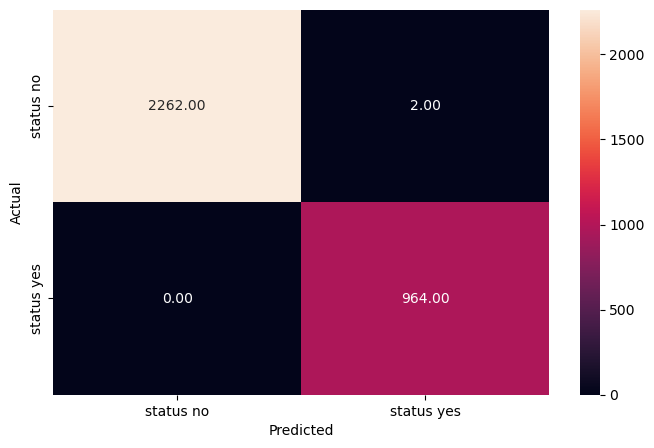

In [553]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

Here, the class of interest is 1 i.e. identifying the leads that might converge into paying customers.
Reading the confusion matrix (clockwise):

True Negative (Actual=0, Predicted=0): Model predicts that a lead would not converge and the lead does not converge.

False Positive (Actual=0, Predicted=1): Model predicts that a lead would  converge  and the lead does not converge.

False Negative (Actual=1, Predicted=0): Model predicts that a lead would not converge  but the but the lead converges.

True Positive (Actual=1, Predicted=1):Model predicts that a lead would  converge  and the lead actually converges.

The model is overfitting with recall, precision and accuracy being 100%.

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       971
           1       0.65      0.62      0.64       413

    accuracy                           0.79      1384
   macro avg       0.75      0.74      0.74      1384
weighted avg       0.78      0.79      0.79      1384



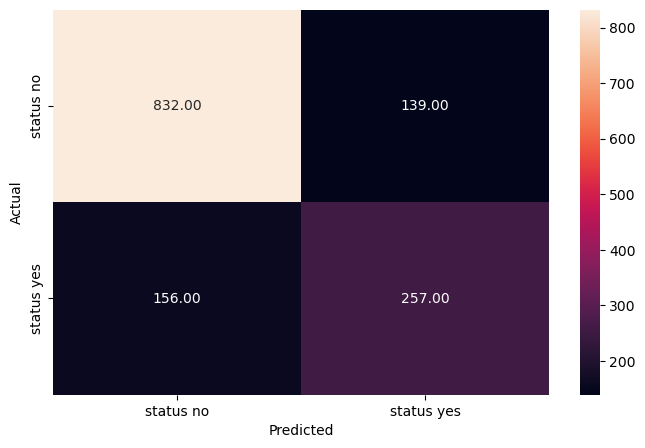

In [554]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

 - The performance of the model for the training dataset is high, in fact it is overfitting.
 - For the test dataset the performance is lower. Accuracy is 79%. 
 - The recall is 100% for the training and 62% for the test dataset. 

<Axes: xlabel='Importance'>

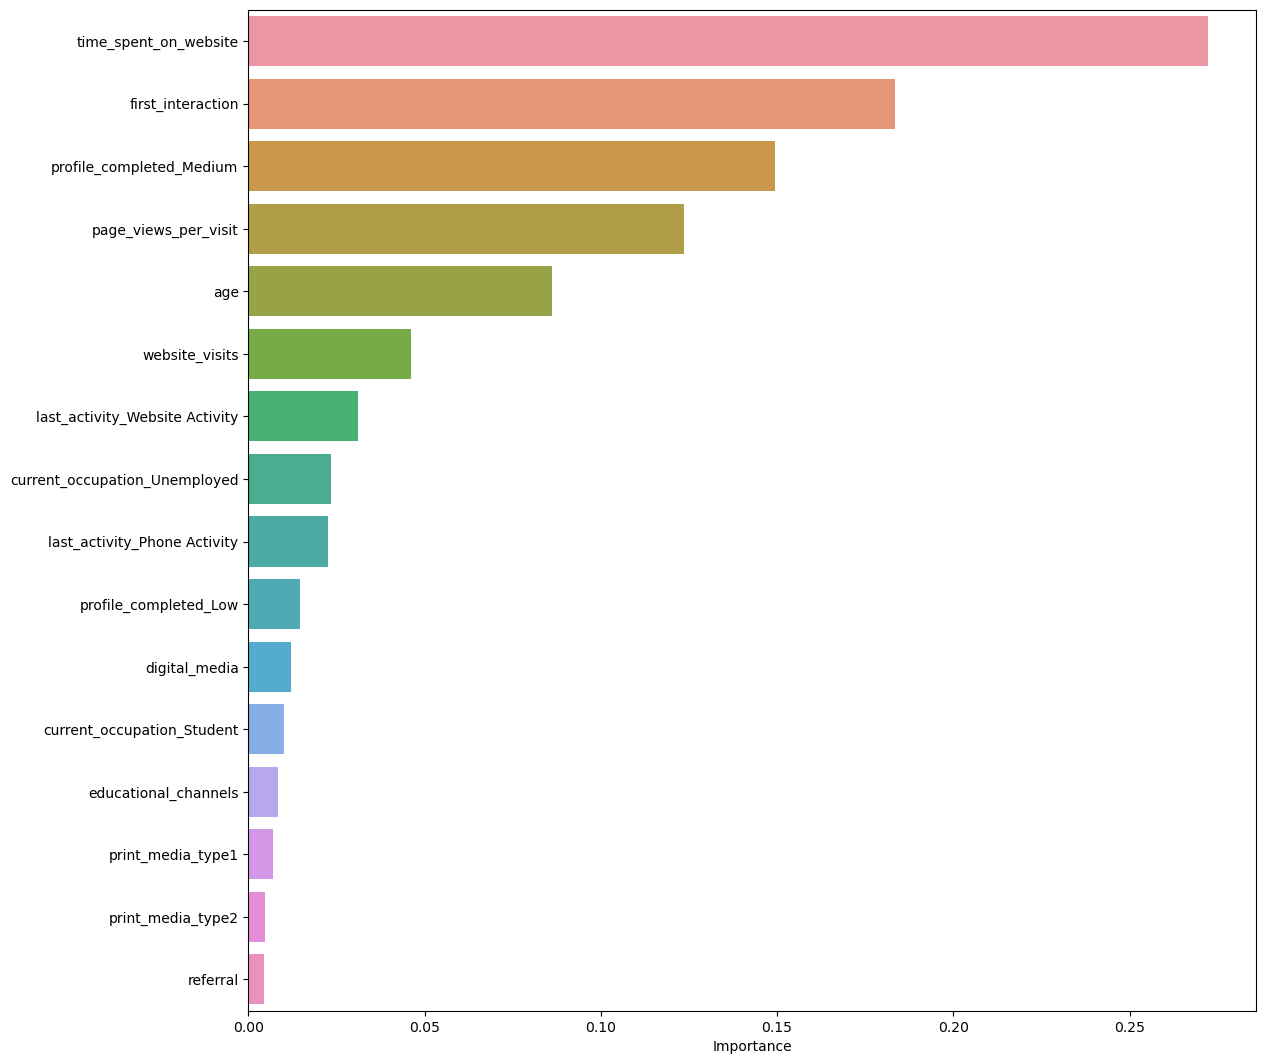

In [558]:
# Plot the feature importance

importances = dt.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

 - Time spent on website is the most important feature, followed by first interaction and profile completed medium. 
 - Print media type 2 and referral are the least relevant features, it might be an option to leave them out.

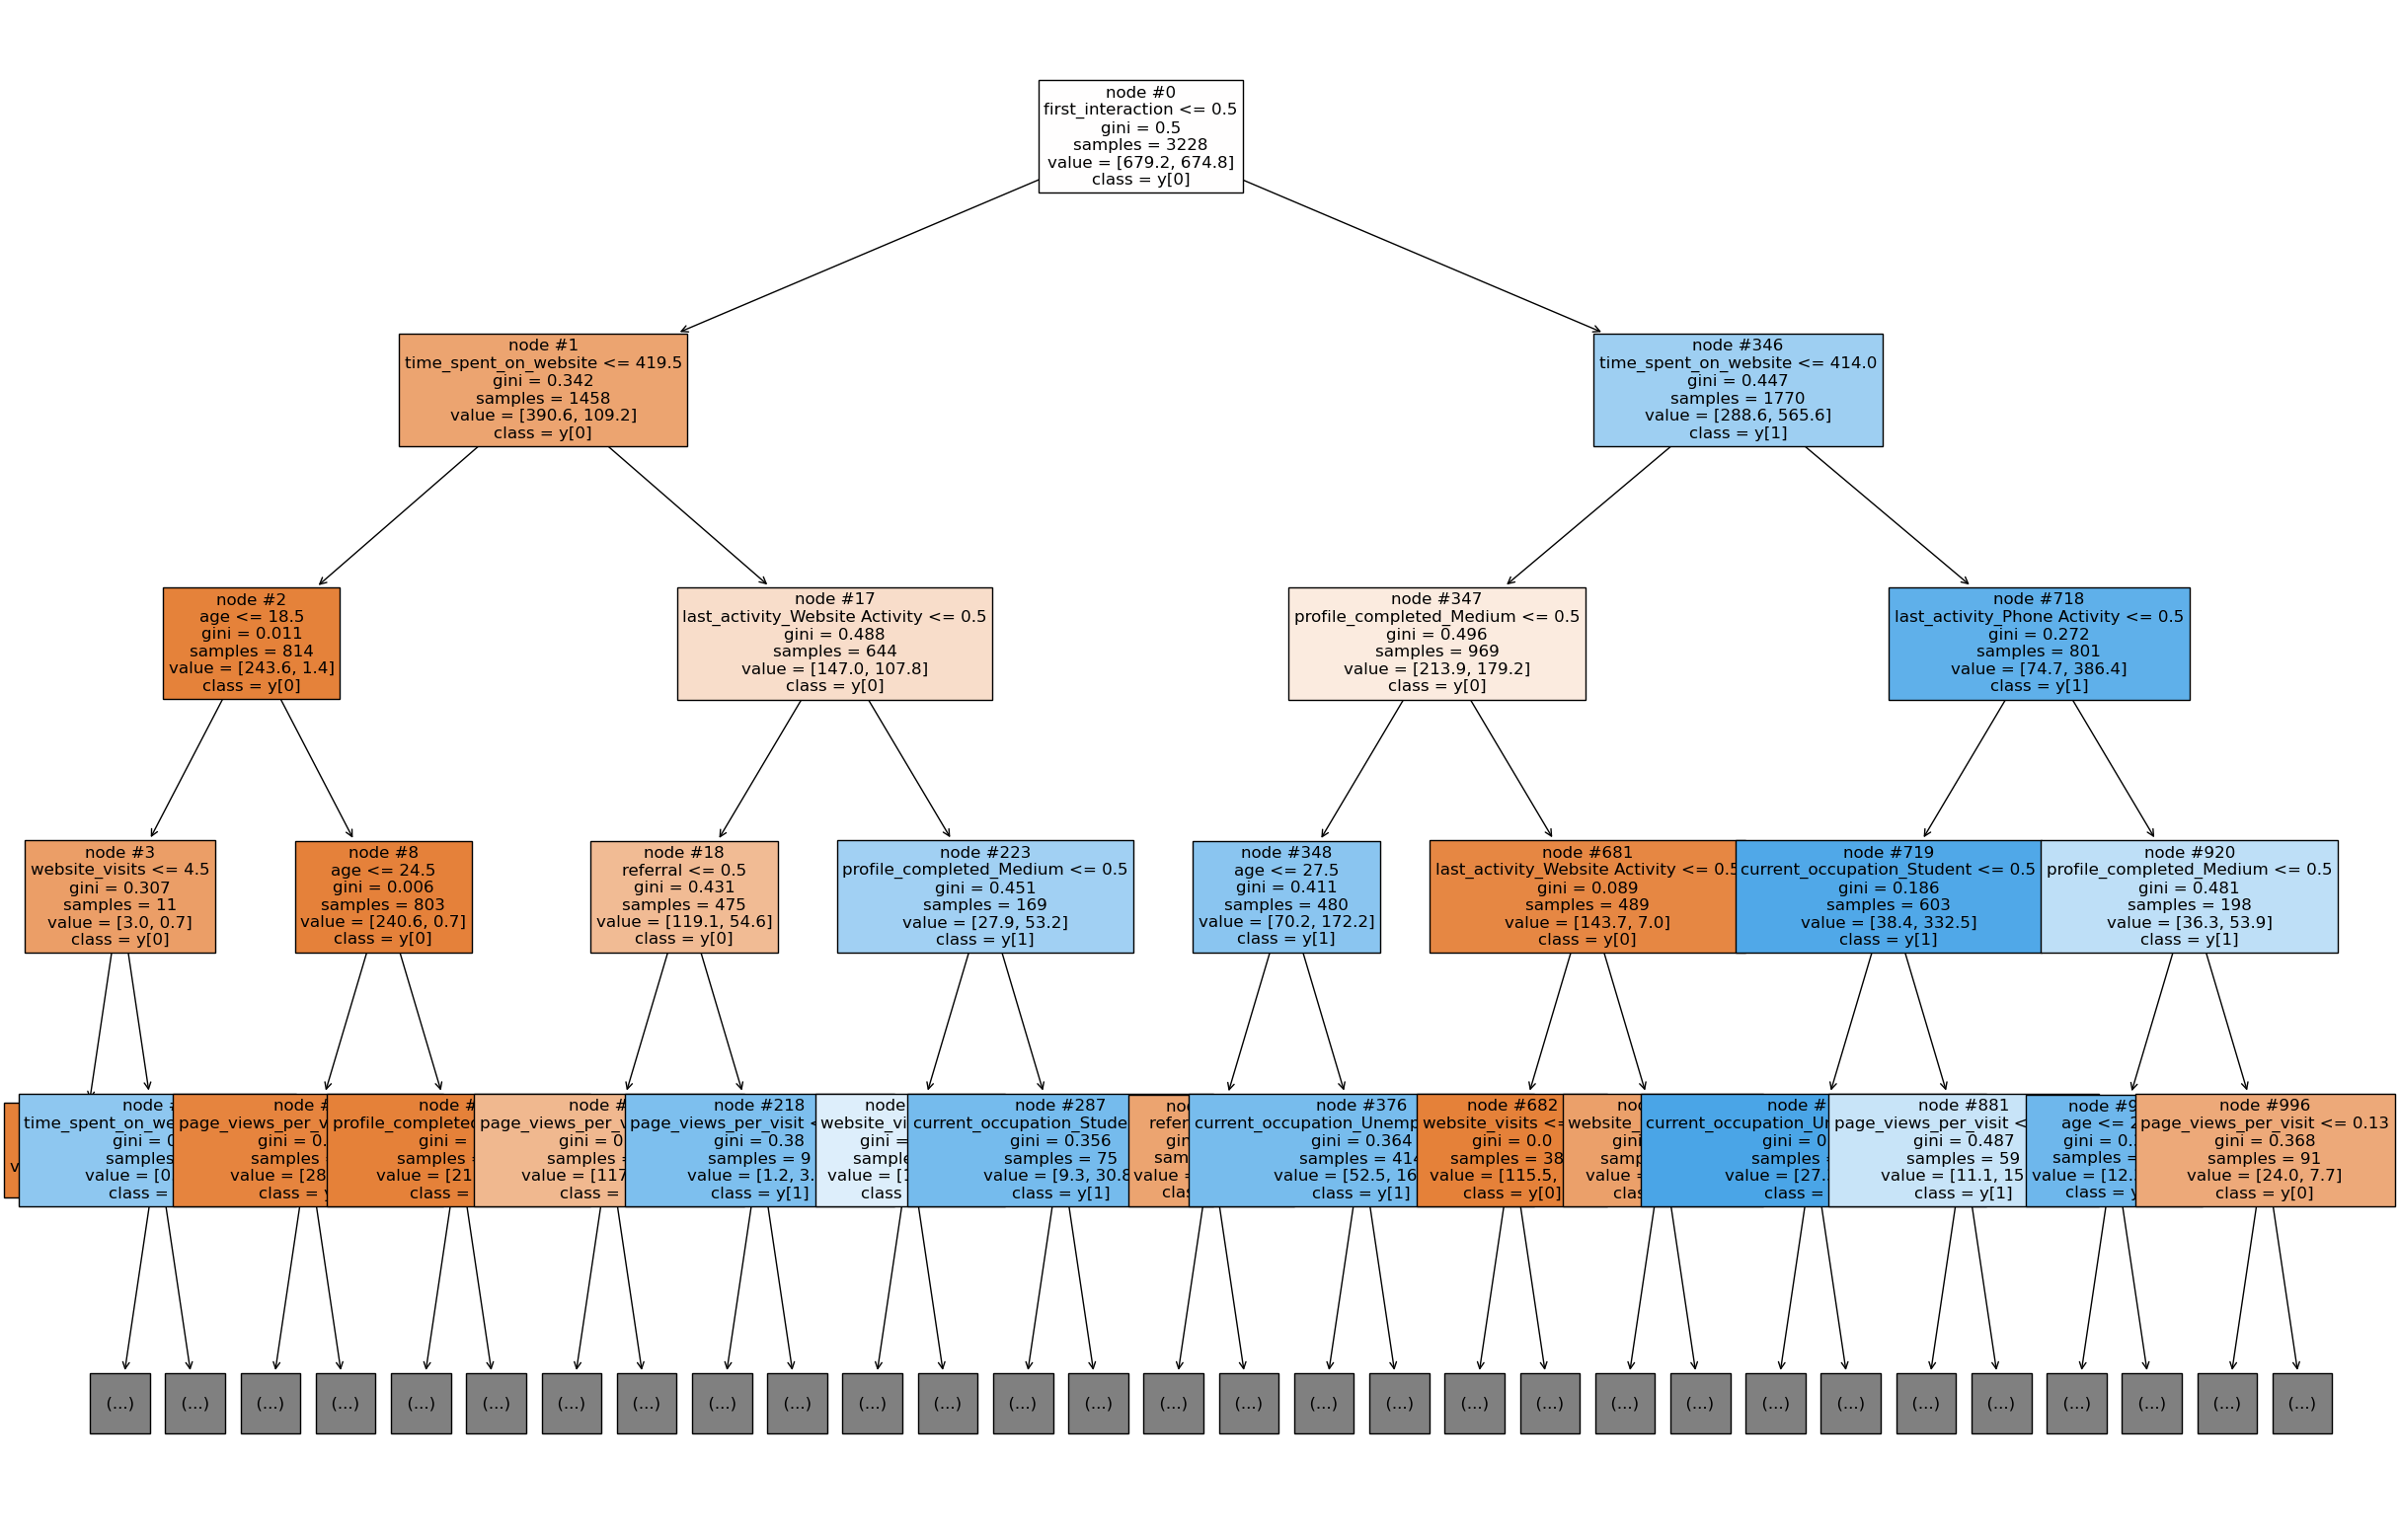

In [559]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

Blue leaves represent  status yes, and the orange leaves represent the  status no. Also, the more the number of observations in a leaf, the darker its color gets.

## Do we need to prune the tree?

Since the model is overfitting it would be reasonable to tune the model.

In [560]:
# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.3, 1: 0.70}, random_state = 1)

# Grid of parameters to choose from
parameters ={'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=3,
                       min_samples_leaf=5, random_state=1)

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      2264
           1       0.60      0.91      0.72       964

    accuracy                           0.79      3228
   macro avg       0.78      0.83      0.78      3228
weighted avg       0.85      0.79      0.80      3228



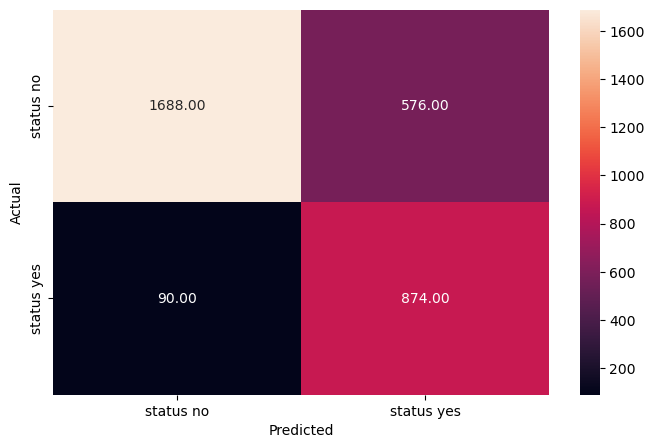

In [561]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_estimator.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.94      0.73      0.82       971
           1       0.58      0.89      0.70       413

    accuracy                           0.78      1384
   macro avg       0.76      0.81      0.76      1384
weighted avg       0.83      0.78      0.79      1384



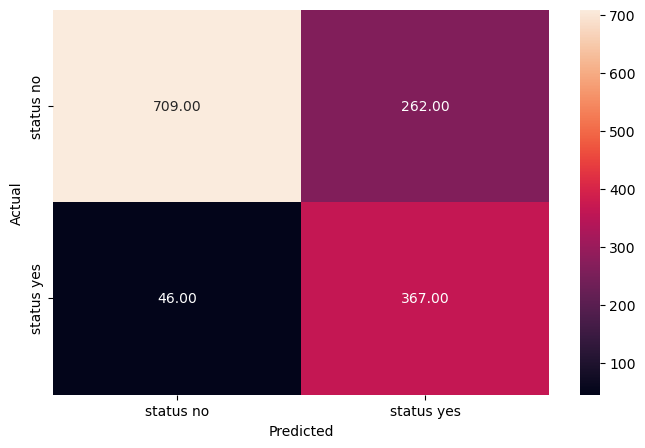

In [562]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

For the training dataset **accuracy of the tuned model is 79% and the recall 91%**. The test set has an **accuracy  of 78% and a recall of 89%** . The model performs better than the untuned version given that overfitting has decreased and that the recall of the test dataset has increased.

## Building a Random Forest model

In [563]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.3, 1: 0.70}, random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



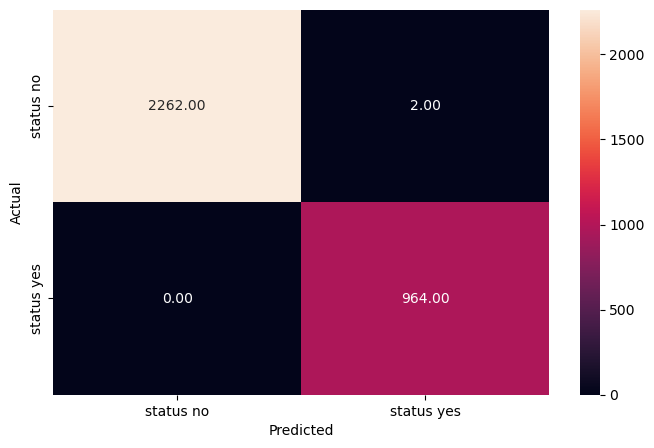

In [564]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

For the random forest training dataset the accuracy and recall are 100%. The model is overfitting. 

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       971
           1       0.78      0.71      0.75       413

    accuracy                           0.86      1384
   macro avg       0.83      0.81      0.82      1384
weighted avg       0.85      0.86      0.85      1384



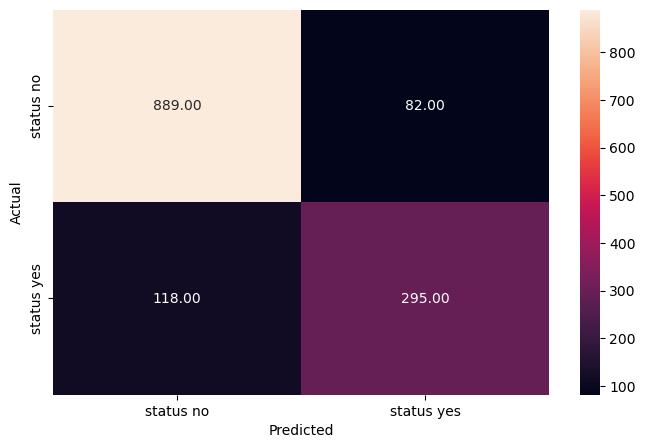

In [565]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

On the test data recall is 71 %  and accuracy 86%. But given that the training dataset is overfitting it would be good to tune the model.The random forest model does perform better than the untuned decision tree model. 

<Axes: xlabel='Importance'>

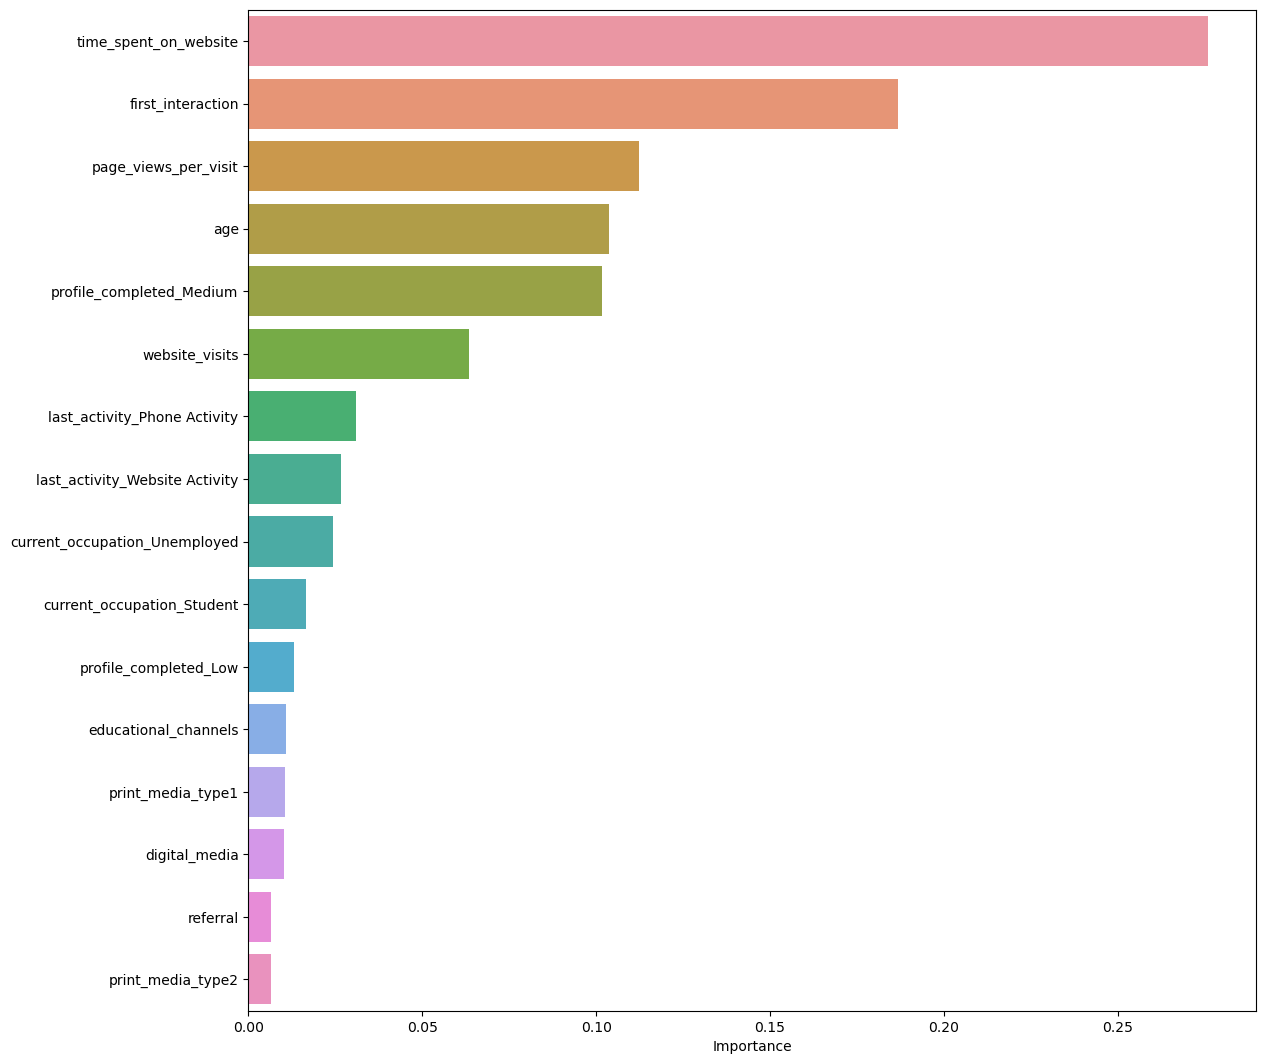

In [566]:
importances = rf_estimator.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

According to the random forest model time spent on website is the most important feature, followd by first interaction and page views per visit. Referral and print media type2 are the two least important features.

## Do we need to prune the tree?

Yes given the overfitting tuning the model is recommended.

In [569]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.3, 1: 0.70}, random_state = 1)

# Grid of parameters to choose from
params_rf = {'max_depth': [6,7], 
              'min_samples_leaf': [20, 25],
              'max_features' : [0.8, 0.9],
              'max_samples': [0.9, 1],
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [570]:
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=6,
                       max_features=0.8, max_samples=0.9, min_samples_leaf=25,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.95      0.82      0.88      2264
           1       0.68      0.89      0.77       964

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.87      0.84      0.85      3228



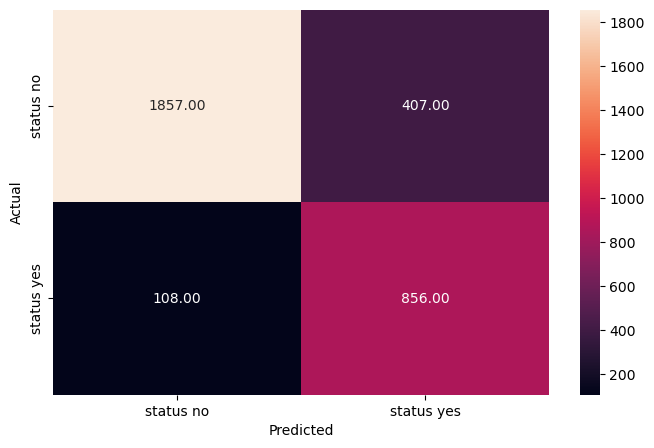

In [572]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

The tuned random forest traning dataset has an accuracy of 84% and a recall of 89%.

              precision    recall  f1-score   support

           0       0.93      0.80      0.86       971
           1       0.65      0.85      0.73       413

    accuracy                           0.82      1384
   macro avg       0.79      0.83      0.80      1384
weighted avg       0.84      0.82      0.82      1384



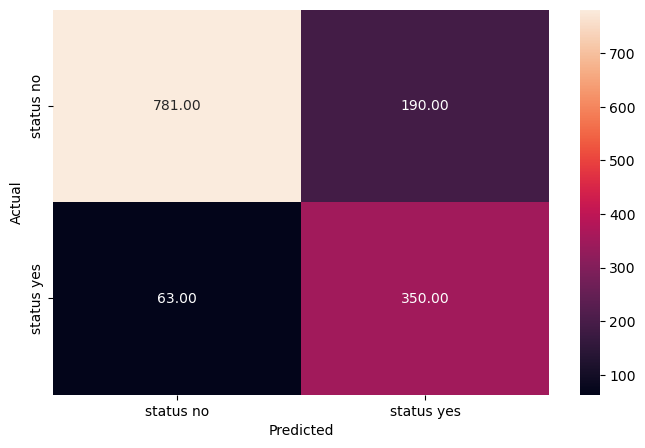

In [573]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

The tuned random forest model for the test dataset has an accuracy of 82% and a recall of 85%.

<Axes: xlabel='Importance'>

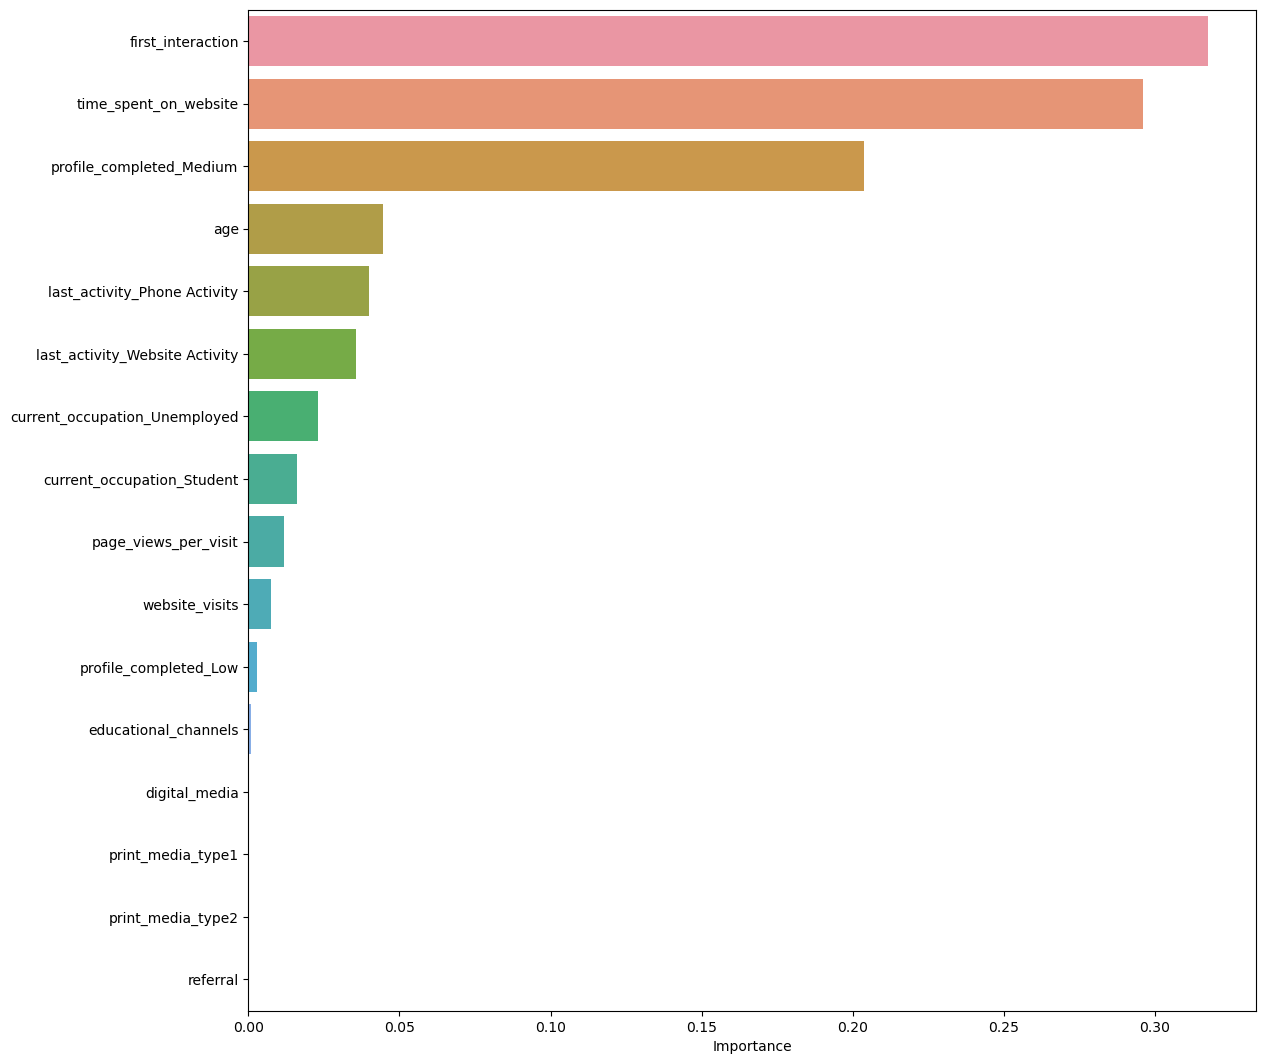

In [575]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

The most and least important features did not change.

## Actionable Insights and Recommendations

Conclusions:
We have tried multiple models and were able to identify the key factors involved in lead conversion. Given that we are interested in modelling recall, the model with the best performance was the tuned desicion tree model with an accuracy of 79% on the training dataset and of 78% on the test dataset and a recall of 91% on the training dataset and of 89% on the test dataset. 

Recommendations:

We saw that the most important drivers of lead conversion are time spent on the website, first interaction and profile completion. For the latter two, first interaction via website resulted in more lead conversion as well as a more complete profile. 

The organization should focus on improving the website, making it more attractive to spent more time on the site. Customer research on website use and A/B-testing might help to further boost the website use and customer experience.

In addition, it should be facilitated that filling in the profile is quick and easy or that there are incentives for potential customers to take the time to fill in the profile for instance by receiving extra information or a discount as a completed profile facilitates lead conversion. Potential customers with a completed profile can be more easiliy targeted with customised advertisements. 

Given that app users were less likely to buy products, it might be recommended to either focus more on website-users or to improve the app. 

On the other hand the analysis showed that print media type 2 has  hardly been seen by leads  an has little impact on lead conversion. The company might consider to stop using this channel for acquiring new customers.
